# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#On importe les données dans un dataframe
df_Hist = pd.read_excel("historique_immobilier_paris_2017_2021_vdef2.xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent
print(df_Hist.dtypes)

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object


In [4]:
# Modification type du code postal en 'Str'
df_Hist["code_postal"] = df_Hist["code_postal"].astype(str)

In [5]:
# Vérification des NAN
df_Hist.isna().sum()

date_mutation       0
valeur_fonciere     0
adresse_numero      0
adresse_nom_voie    0
code_postal         0
nom_commune         0
code_type_local     0
type_local          0
surface_reelle      0
dtype: int64

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [6]:
print("La liste des différents types de biens immobiliers dans les données est :")
print(df_Hist["type_local"].unique())

La liste des différents types de biens immobiliers dans les données est :
['Appartement' 'Local industriel. commercial ou assimilé']


In [7]:
types_biens = df_Hist["type_local"].unique()
codes_types = df_Hist["code_type_local"].unique()

print(f"On observe qu'il y a {len(types_biens)} types de biens, et que leurs codes types sont : {', '.join(map(str, codes_types))}.")

On observe qu'il y a 2 types de biens, et que leurs codes types sont : 2, 4.


### 3. Nombre de transactions

In [8]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
# Nombre total de transactions
print(f"Le nombre de transactions dans les données est : {len(df_Hist)}")

# Nombre de transactions pour les appartements
nb_appartements = df_Hist[df_Hist["type_local"] == "Appartement"].shape[0]
print(f"Le nombre de transactions pour les appartements dans les données est : {nb_appartements}")

# Nombre de transactions pour les locaux commerciaux
nb_locaux = df_Hist[df_Hist["type_local"] == "Local industriel. commercial ou assimilé"].shape[0]
print(f"Le nombre de transactions pour les locaux commerciaux dans les données est : {nb_locaux}")

Le nombre de transactions dans les données est : 26196
Le nombre de transactions pour les appartements dans les données est : 24353
Le nombre de transactions pour les locaux commerciaux dans les données est : 1843


### 4. interval de l'historique des données

In [9]:
#On vérifie également la plage de l'historique disponible

print(f"La première date de transaction dans les données est le : {df_Hist['date_mutation'].min().date()}")
print(f"La dernière date de transaction dans les données est le : {df_Hist['date_mutation'].max().date()}")

La première date de transaction dans les données est le : 2017-01-02
La dernière date de transaction dans les données est le : 2021-12-31


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [10]:
# Calcul de la colonne
df_Hist["prix_m2"] = df_Hist["valeur_fonciere"] / df_Hist["surface_reelle"]

In [11]:
df_Hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  object        
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
 9   prix_m2           26196 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [12]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
# On garde uniquement les appartements
df_appartements = df_Hist[df_Hist["type_local"] == "Appartement"].copy()

# On sélectionne les colonnes utiles
colonnes_utiles = [
    "date_mutation", "valeur_fonciere", "code_postal",
    "surface_reelle", "prix_m2","type_local"
]

In [13]:
df_appartements

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836
...,...,...,...,...,...,...,...,...,...,...
26189,2021-02-24,8.489150e+05,3,RUE DE BIRAGUE,75004,Paris 4e Arrondissement,2,Appartement,66,12862.347945
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,Appartement,37,12735.781918
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,Appartement,26,12016.765753
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,Appartement,13,12017.182877


In [14]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée

# Extraire l'année
df_appartements["annee"] = df_appartements["date_mutation"].dt.year

# Grouper par année et calculer moyennes
df_evolution = df_appartements.groupby("annee").agg({
    "prix_m2": "mean",
    "surface_reelle": "mean"
}).reset_index()

In [15]:
# Afficher le résultat
df_evolution

,annee,prix_m2,surface_reelle
0,2017,9492.859195,44.627737
1,2018,10031.403432,44.271671
2,2019,10562.712581,43.361645
3,2020,10674.872650,42.900654
4,2021,10455.600126,43.479864


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
- On constate que le prix moyen au m² des appartements à Paris a globalement augmenté de 2017 à 2020, passant de ~9 493€ à ~10 675€, puis il y a une légère baisse en 2021 à ~10 456€.
- La surface moyenne reste assez stable, autour de 43-44 m², donc la variation de prix n’est pas liée à un changement de taille des appartements vendus, mais bien à l’évolution du marché immobilier.

Nous allons créer un graphique pour mieux le visualiser.

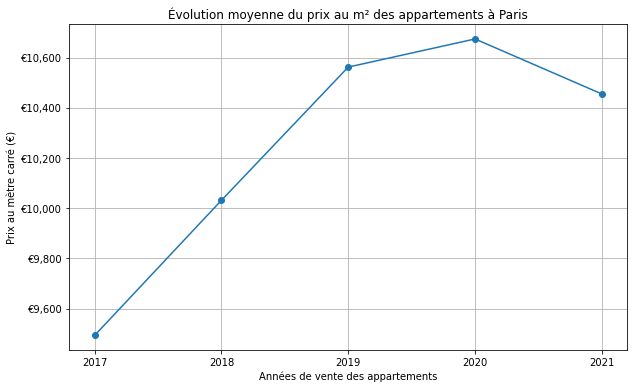

In [16]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10, 6))

# Tracer prix_m2 en fonction de l'année
plt.plot(df_evolution["annee"].astype(str), df_evolution["prix_m2"], marker='o')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au mètre carré (€)')
plt.title('Évolution moyenne du prix au m² des appartements à Paris')

# Formatage de l'axe y en euros
formatter = ticker.StrMethodFormatter('€{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [17]:
#Liste des codes postaux dans nos données.
codes_postaux = df_appartements["code_postal"].unique()
print(sorted(codes_postaux))

['75001', '75002', '75003', '75004', '75005', '75006', '75007', '75008', '75009', '75010', '75011', '75012', '75013', '75014', '75015', '75016', '75017', '75018', '75019', '75020']


In [18]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_appartements["annee"] = df_appartements["date_mutation"].dt.year

# Grouper par année et code postal, calculer prix moyen au m2
df_arrondissements = df_appartements.groupby(["annee", "code_postal"]).agg({
    "prix_m2": "mean"
}).reset_index()

In [19]:
df_arrondissements.head(5)

,annee,code_postal,prix_m2
0,2017,75001,11762.706289
1,2017,75002,10920.126562
2,2017,75003,11679.818729
3,2017,75004,12407.227522
4,2017,75005,11306.752404


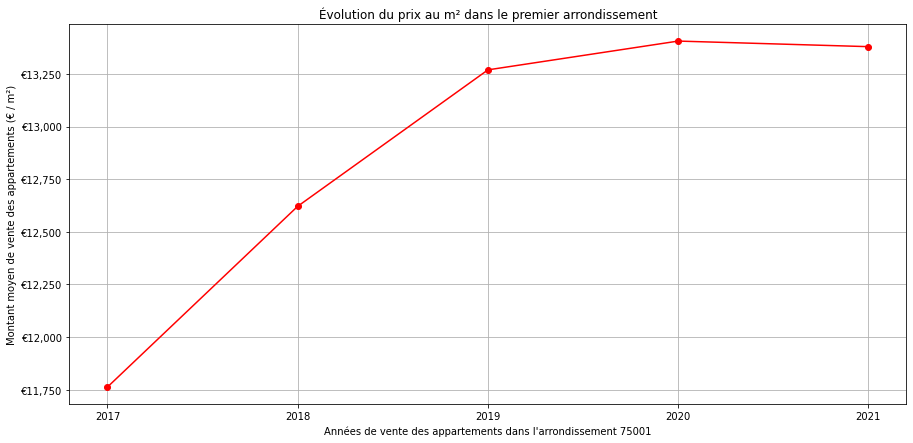

In [20]:
# Filtrer les données pour le 1er arrondissement
df_75001 = df_arrondissements[df_arrondissements["code_postal"] == "75001"]

plt.figure(figsize=(15, 7))

# Tracer les années (en string) vs prix_m2
plt.plot(df_75001["annee"].astype(str), df_75001["prix_m2"], color='red', marker='o')

plt.xlabel("Années de vente des appartements dans l'arrondissement 75001")
plt.ylabel("Montant moyen de vente des appartements (€ / m²)")

formatter = ticker.StrMethodFormatter('€{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True)
plt.title("Évolution du prix au m² dans le premier arrondissement")
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

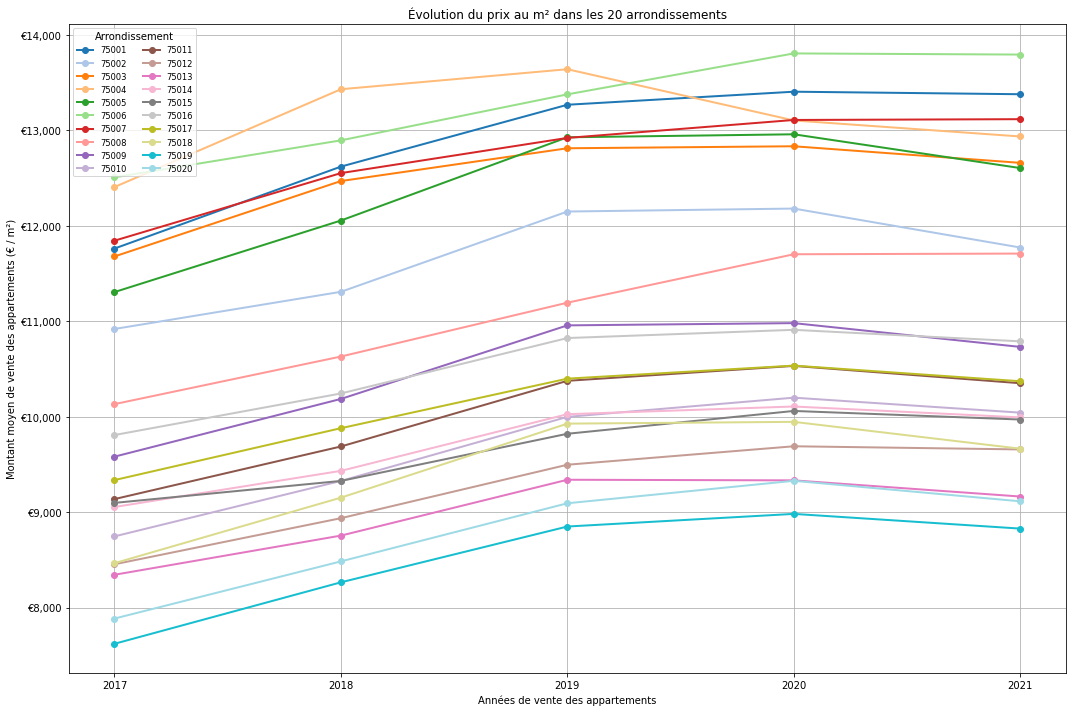

In [21]:
plt.figure(figsize=(15, 10))

# Liste des arrondissements triés
arrondissements = sorted(df_arrondissements["code_postal"].astype(str).unique())

# Générer 20 couleurs à partir d'une colormap
colors = cm.get_cmap('tab20', len(arrondissements))

for i, arr in enumerate(arrondissements):
    df_temp = df_arrondissements[df_arrondissements["code_postal"] == arr]
    plt.plot(
        df_temp["annee"].astype(str),
        df_temp["prix_m2"],
        label=arr,
        color=colors(i),
        marker='o',
        linewidth=2
    )

plt.xlabel("Années de vente des appartements")
plt.ylabel("Montant moyen de vente des appartements (€ / m²)")
formatter = ticker.StrMethodFormatter('€{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.title("Évolution du prix au m² dans les 20 arrondissements")

# Légende claire sur 2 colonnes
plt.legend(title="Arrondissement", loc="upper left", fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

On observe que globalement que ?

- Les prix ont augmenté entre 2017 et 2020, puis ont commencé à baisser à partir de 2021 (correction ou stagnation du marché).
- différence entre les prix des arrondissements.

### 7. Prix au metre carré par transaction dans un arrondissement

In [22]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé

# Filtrer sur le 75006
transactions_75006 = df_appartements[df_appartements["code_postal"] == "75006" ]

# Nombre de transactions
nb_transactions = len(transactions_75006)
print(f"Nombre de transactions dans le 6ème arrondissement : {nb_transactions}")

Nombre de transactions dans le 6ème arrondissement : 709


On constate que ?
 - c’est un volume raisonnable — donc :

- Le prix élevé n’est pas dû à un manque de données.
- Ça reflète la réalité du marché dans ce quartier très recherché (quartier chic, central, proche du Jardin du Luxembourg, etc.).

Affichons l'historique des transactions pour visualiser la dispersion des données :

In [23]:
df_75006 = df_arrondissements[df_arrondissements["code_postal"] == "75006"]

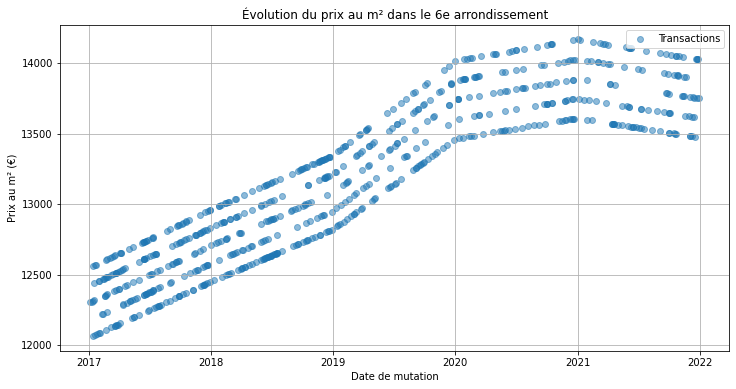

In [24]:
# Filtrer les données propres du 6e arrondissement
df_75006 = df_appartements[
    (df_appartements["code_postal"] == "75006") &
    (df_appartements["prix_m2"].notna()) &
    (df_appartements["prix_m2"] > 0)
].copy()

# Convertir la date en format numérique (timestamp)
df_75006["timestamp"] = df_75006["date_mutation"].astype('int64')

plt.figure(figsize=(12, 6))
plt.scatter(df_75006["date_mutation"], df_75006["prix_m2"], alpha=0.5, label='Transactions')

plt.xlabel('Date de mutation')
plt.ylabel('Prix au m² (€)')
plt.title('Évolution du prix au m² dans le 6e arrondissement')
plt.legend()
plt.grid(True)
plt.show()

On observe que ?
 - Des points très haut = ventes très chères (souvent bien de luxe ou erreur de saisie)
 - Des zones avec beaucoup de points serrés =>  période avec beaucoup de ventes
 - Des trous =>  peut signaler un manque de données ou une période creuse (ex : confinement en 2020)

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [25]:
#On calcule la corrélation de Spearman
from scipy import stats

# Convertir la date en format numérique (timestamp)
df_75006["timestamp"] = df_75006["date_mutation"].astype('int64')  # en nanosecondes

# Calcul de la corrélation de Pearson
corr_pearson, p_value = stats.pearsonr(df_75006["timestamp"], df_75006["prix_m2"])


print(f"Coefficient de corrélation de Pearson : {corr_pearson:.3f}")
print(f"P-value associée : {p_value:.3e}")

Coefficient de corrélation de Pearson : 0.904
P-value associée : 7.108e-263


Donc nous pouvons confirmer la corrélation.

- Avec un coefficient de Pearson de 0.904, il y a une très forte corrélation positive entre la date et le prix au m² dans le 6e arrondissement : les prix ont clairement augmenté au fil du temps.

- La p-value est extrêmement faible (7.108e-263), bien en dessous de 0.05, donc cette corrélation est statistiquement très significative.

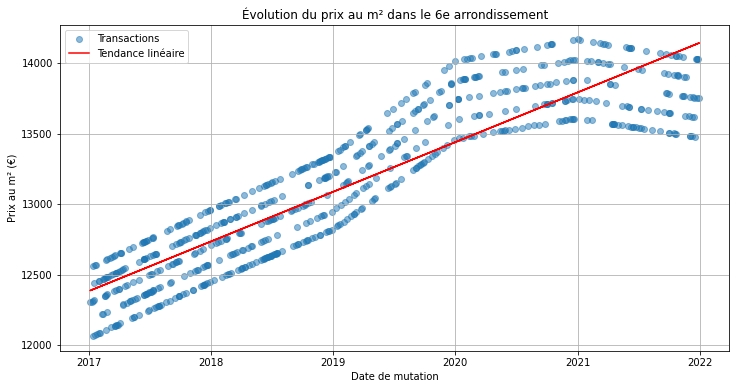

In [26]:
# Nuage de points
plt.figure(figsize=(12, 6))
plt.scatter(df_75006["date_mutation"], df_75006["prix_m2"], alpha=0.5, label='Transactions')

# Calcul et tracé de la droite de tendance (régression linéaire)
coef = np.polyfit(df_75006["timestamp"], df_75006["prix_m2"], 1)
poly1d_fn = np.poly1d(coef)

# Tracer la droite de tendance sur l'axe temporel (convertir timestamp en datetime pour x)
plt.plot(df_75006["date_mutation"], poly1d_fn(df_75006["timestamp"]), color='red', label='Tendance linéaire')

plt.xlabel('Date de mutation')
plt.ylabel('Prix au m² (€)')
plt.title('Évolution du prix au m² dans le 6e arrondissement')
plt.legend()
plt.grid(True)
plt.show()

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [27]:
from scipy import stats

# Filtrer les données propres (valeur fonciere et surface > 0)
df_clean = df_appartements[
    (df_appartements["valeur_fonciere"].notna()) &
    (df_appartements["surface_reelle"].notna()) &
    (df_appartements["valeur_fonciere"] > 0) &
    (df_appartements["surface_reelle"] > 0)
].copy()

# Calcul corrélation Pearson entre valeur fonciere et surface
corr_valeur_surface, p_value_valeur_surface = stats.pearsonr(df_clean["valeur_fonciere"], df_clean["surface_reelle"])

print(f"Coefficient de corrélation entre valeur foncière et surface : {corr_valeur_surface:.3f}")
print(f"P-value associée : {p_value_valeur_surface:.3e}")

Coefficient de corrélation entre valeur foncière et surface : 0.980
P-value associée : 0.000e+00


Conclusions : 
- Un coefficient de corrélation de 0.980 montre une très forte relation positive entre la surface et la valeur foncière : plus la surface augmente, plus la valeur foncière augmente quasiment de façon proportionnelle.

- La p-value est 0.000, donc la corrélation est hautement significative statistiquement.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [28]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_commerciaux = df_Hist[df_Hist["type_local"] == "Local industriel. commercial ou assimilé"].copy()
# Vérifier
print(df_commerciaux["type_local"].value_counts())

Local industriel. commercial ou assimilé    1843
Name: type_local, dtype: int64


In [29]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

# Extraire l'année
df_commerciaux["annee"] = df_commerciaux["date_mutation"].dt.year

# Grouper par année et calculer moyennes
df_evolution_2 = df_commerciaux.groupby("annee").agg({
    "prix_m2": "mean",
    "surface_reelle": "mean"
}).reset_index()

# Afficher le résultat
print(df_evolution_2)

   annee       prix_m2  surface_reelle
0   2017  10949.909217       89.991404
1   2018  11569.499180       88.096866
2   2019  11960.132050       82.826389
3   2020  11966.470204       85.630952
4   2021  12006.488691       92.832000


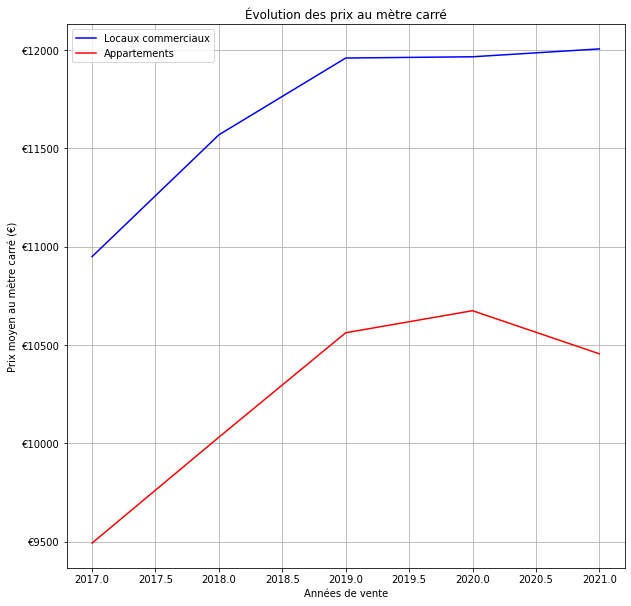

In [30]:
# Calcul des moyennes annuelles pour les locaux commerciaux
df_commerciaux["annee"] = df_commerciaux["date_mutation"].dt.year
prix_m2_commerciaux = df_commerciaux.groupby("annee")["prix_m2"].mean().reindex(range(2017,2022))

# Même chose pour les appartements
df_appartements["annee"] = df_appartements["date_mutation"].dt.year
prix_m2_appartements = df_appartements.groupby("annee")["prix_m2"].mean().reindex(range(2017,2022))

# Tracer
plt.figure(figsize=(10,10))
plt.plot(prix_m2_commerciaux.index, prix_m2_commerciaux.values, label='Locaux commerciaux', color='blue')
plt.plot(prix_m2_appartements.index, prix_m2_appartements.values, label='Appartements', color='red')
plt.xlabel('Années de vente')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Évolution des prix au mètre carré')
plt.show()

Le prix au metre carré des locaux commerciaux est beaucoup plus élevé que Le prix au metre carré des appartements. 

=> Le type de bien à une influence sur le prix au metre carré également.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [31]:
dataset_encode=df_Hist.join(pd.get_dummies(df_Hist['code_postal']))
dataset_encode=dataset_encode.join(pd.get_dummies(df_Hist['type_local']))
dataset_encode['timestamp']=dataset_encode['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9
dataset_encode.drop(['date_mutation','code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','prix_m2'],axis='columns',inplace=True)
dataset_encode.head(5)

,valeur_fonciere,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,...,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,5.505597e+05,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.483402e+09
1,1.576492e+06,163,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.484179e+09
2,6.577574e+05,66,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.484006e+09
3,2.500868e+05,22,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484006e+09
4,1.762667e+05,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484266e+09


In [32]:
dataset_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   valeur_fonciere                           26196 non-null  float64
 1   surface_reelle                            26196 non-null  int64  
 2   75001                                     26196 non-null  uint8  
 3   75002                                     26196 non-null  uint8  
 4   75003                                     26196 non-null  uint8  
 5   75004                                     26196 non-null  uint8  
 6   75005                                     26196 non-null  uint8  
 7   75006                                     26196 non-null  uint8  
 8   75007                                     26196 non-null  uint8  
 9   75008                                     26196 non-null  uint8  
 10  75009                             

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# On sépare le jeu de données entre echantillons d'apprentissage et de test 
X = dataset_encode.drop(columns=["valeur_fonciere"])
y = dataset_encode["valeur_fonciere"]
# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = train_test_split(dataset_encode[['surface_reelle','75001','75002','75003','75004','75005','75006','75007','75008','75009','75010','75011','75012','75013','75014','75015','75016','75017','75018','75019','75020','Appartement','Local industriel. commercial ou assimilé','timestamp']],dataset_encode['valeur_fonciere'],test_size=0.33,random_state=6)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [36]:
regr_lin=LinearRegression().fit(X_train,y_train)
y_predict_lin=regr_lin.predict(X_test)
(np.mean(abs(y_test-y_predict_lin)/y_test))*100

9.579814673622149

- l'agorithme fait 9,5% en moy d'erreur sur la prédiction de la valeur fonciere

Notre algorithme fait donc ? % d'erreur en moyenne sur la prédiction de la valeur foncière.
- R² ~ 0.987 : Le modèle explique 98,7% de la variance des prix, donc il capture très bien la relation entre les variables et la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Le modèle linéaire est performant pour prédire la valeur foncière à partir de la surface, l’année, le code postal et le type de bien.

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [37]:
#On importe les données dans un dataframe
df_actifs = pd.read_excel("portefeuille_actifs+(3).xlsx")

In [38]:
df_actifs.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [39]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
portefeuille_encode=df_actifs.join(pd.get_dummies(df_actifs['code_postal']))
portefeuille_encode=portefeuille_encode.join(pd.get_dummies(df_actifs['type_local']))
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
portefeuille_encode['timestamp']=int(dt.datetime(2022, 12, 31).timestamp())
portefeuille_encode.drop(['code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','code_commune','surface_carrez','nombre_pieces_principales','latitude','longitude'],axis='columns',inplace=True)
portefeuille_encode.rename(columns={'surface_reelle_bati':'surface_reelle'}, inplace=True)
portefeuille_encode.head(5)

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200


In [40]:
portefeuille_encode.columns = portefeuille_encode.columns.astype(str)

In [41]:
#On effectue la prédiction
y_predict_final=regr_lin.predict(portefeuille_encode)
#On vérifie les 10 premières valeurs
y_predict_final[:10]

array([430270.55553441, 367219.5507523 , 827114.93435429, 876575.72223618,
       320423.16532214, 459461.30455065, 388610.03371053, 643214.57268592,
       138286.67687846, 140637.17956687])

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [42]:
portefeuille_prediction=portefeuille_encode
portefeuille_prediction['valeur_fonciere_prediction']=y_predict_final
portefeuille_prediction.head()

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp,valeur_fonciere_prediction
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,430270.555534
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,367219.550752
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,827114.934354
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,876575.722236
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,320423.165322


In [43]:
portefeuille_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   surface_reelle                            275 non-null    int64  
 1   75001                                     275 non-null    uint8  
 2   75002                                     275 non-null    uint8  
 3   75003                                     275 non-null    uint8  
 4   75004                                     275 non-null    uint8  
 5   75005                                     275 non-null    uint8  
 6   75006                                     275 non-null    uint8  
 7   75007                                     275 non-null    uint8  
 8   75008                                     275 non-null    uint8  
 9   75009                                     275 non-null    uint8  
 10  75010                                 

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [44]:
print('la valorisation du segment particulier est (en millions deuros):')
portefeuille_prediction.loc[portefeuille_prediction['Appartement']==1]['valeur_fonciere_prediction'].sum()/1000000

la valorisation du segment particulier est (en millions deuros):


71.0181620676128

In [45]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est (en millions deuros):')
portefeuille_prediction.loc[portefeuille_prediction['Local industriel. commercial ou assimilé']==1]['valeur_fonciere_prediction'].sum()/1000000

la valorisation du segment corporate est (en millions deuros):


97.95357621149032

Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- la branche qui,selon notre prédiction, a le plus de valeur à la date demandée c'est à dire au 31 décembre 2022 est le segment corporate.



# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [46]:
#On importe les données dans un dataframe
df_echantillon = pd.read_excel("echantillon_a_classer2.xlsx")

In [47]:
df_echantillon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   valeur_fonciere  40 non-null     float64
 1   code_postal      40 non-null     int64  
 2   nom_commune      40 non-null     object 
 3   surface_reelle   40 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [48]:
df_echantillon.head(5)

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [49]:
data_a_classer_encode=df_echantillon
data_a_classer_encode['prix_metre_carre']=data_a_classer_encode['valeur_fonciere']/data_a_classer_encode['surface_reelle']
data_a_classer_encode.drop(columns=['code_postal','nom_commune','valeur_fonciere','surface_reelle'],inplace=True)
data_a_classer_encode.sort_values('prix_metre_carre')

,prix_metre_carre
21,7207.217630
12,7238.422973
35,7239.983240
34,7294.202055
19,7296.900510
25,7306.810274
15,7313.114384
20,7322.570548
14,7343.539315
7,7348.917415


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

C:\Users\Noura\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


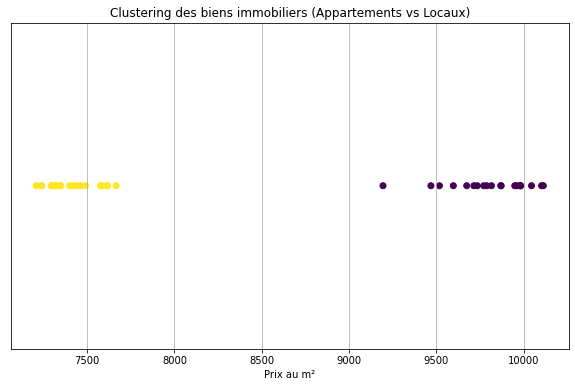

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_a_classer_encode[['prix_metre_carre']])

#KMeans avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#Ajout des labels dans le dataset d’origine
df_echantillon['cluster'] = clusters

#Visualisation
plt.figure(figsize=(10,6))
plt.scatter(df_echantillon['prix_metre_carre'], [0]*len(df_echantillon), c=clusters, cmap='viridis')
plt.xlabel('Prix au m²')
plt.title('Clustering des biens immobiliers (Appartements vs Locaux)')
plt.yticks([])
plt.grid()
plt.show()

In [51]:
print(df_echantillon.groupby('cluster')['prix_metre_carre'].mean())

cluster
0    9806.924674
1    7408.775030
Name: prix_metre_carre, dtype: float64


In [52]:
# Identifier le cluster qui correspond aux appartements
cluster_means = df_echantillon.groupby('cluster')['prix_metre_carre'].mean()
cluster_Local_Commercial = cluster_means.idxmax()  # Le plus cher = Local_Commercial

# Labelliser automatiquement
df_echantillon['type_pred'] = df_echantillon['cluster'].apply(
    lambda x: 'Local commercial' if x == cluster_Local_Commercial else 'Appartement'
)

# Afficher le résultat
df_echantillon[['prix_metre_carre', 'cluster', 'type_pred']].head()

,prix_metre_carre,cluster,type_pred
0,9871.444128,0,Local commercial
1,10045.572493,0,Local commercial
2,9194.697790,0,Local commercial
3,9469.142168,0,Local commercial
4,7463.610005,1,Appartement


In [53]:
# On vérifie les données de la prédiction

In [54]:
# Combien de biens dans chaque cluster
df_echantillon['cluster'].value_counts()

0    20
1    20
Name: cluster, dtype: int64

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [56]:
#On affiche les résultats
# On remplace les valeurs de cluster (0 ou 1) par les labels explicites
df_echantillon['type_pred'] = df_echantillon['cluster'].replace({
    0: 'Local industriel. commercial ou assimilé',
    1: 'Appartement'
})


# Affichage des résultats
df_echantillon[['prix_metre_carre', 'type_pred']].head(40)

,prix_metre_carre,type_pred
0,9871.444128,Local industriel. commercial ou assimilé
1,10045.572493,Local industriel. commercial ou assimilé
2,9194.697790,Local industriel. commercial ou assimilé
3,9469.142168,Local industriel. commercial ou assimilé
4,7463.610005,Appartement
5,9982.016919,Local industriel. commercial ou assimilé
6,9674.262777,Local industriel. commercial ou assimilé
7,7348.917415,Appartement
8,9789.051438,Local industriel. commercial ou assimilé
9,7616.420959,Appartement


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse :

Grâce à notre étude des données foncières parisiennes entre 2017 et 2021, nous avons pu :

- Observer une hausse globale des prix au m² jusqu’en 2020, suivie d’un léger recul en 2021.

- Confirmer la corrélation très forte entre la surface réelle et la valeur foncière (Pearson ≈ 0.98), ce qui valide l’importance de la surface dans la prédiction.

- Identifier que le code postal (localisation) et le type de bien (appartement vs local commercial) ont une influence importante sur le prix.

- Entraîner un modèle de régression linéaire performant (R² ≈ 0.98) pour prédire la valeur d’un bien à partir de ses caractéristiques.

- Utiliser un clustering KMeans pour distinguer automatiquement les types de biens sur la base du prix au m².


Limites de l’exercice :

- Les données de 2022 n’étaient pas disponibles ; on a donc extrapolé à partir de l’historique.

- Le modèle suppose une relation linéaire entre les variables, ce qui n’est pas toujours vrai dans l’immobilier.

- Le prix au m² peut varier fortement pour des raisons non visibles dans les données (étage, état, exposition…).

